## Spotify quick-n-dirty analysis

### Looking at, and cleaning the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_data_df = pd.read_csv('Spotify_final_dataset.csv')

Looking at the data, it appears as though this is artists/songs sorted by Total Streams:

In [3]:
spotify_data_df.head()

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  
0      883369738  
1      864832399  
2      781153024  
3      734857487  
4      718865961

Theres about 11,000 records in the dataset:

In [4]:
spotify_data_df.shape

(11084, 9)

But this might be a problem - it looks like 'Peak Position' is not a numeric field.<br><br>This is probably because it is wrappen in parenthesis.

In [5]:
spotify_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Position                11084 non-null  int64 
 1   Artist Name             11084 non-null  object
 2   Song Name               11080 non-null  object
 3   Days                    11084 non-null  int64 
 4   Top 10 (xTimes)         11084 non-null  int64 
 5   Peak Position           11084 non-null  int64 
 6   Peak Position (xTimes)  11084 non-null  object
 7   Peak Streams            11084 non-null  int64 
 8   Total Streams           11084 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 779.5+ KB


Let's remove the parenthesis and then convert to an integer

In [6]:
spotify_data_df['Peak Position (xTimes)'] = spotify_data_df['Peak Position (xTimes)'].str.replace("(x","", regex=False)
spotify_data_df['Peak Position (xTimes)'] = spotify_data_df['Peak Position (xTimes)'].str.replace(")","", regex=False)
spotify_data_df['Peak Position (xTimes)'] = spotify_data_df['Peak Position (xTimes)'].astype('int64')

In [7]:
spotify_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Position                11084 non-null  int64 
 1   Artist Name             11084 non-null  object
 2   Song Name               11080 non-null  object
 3   Days                    11084 non-null  int64 
 4   Top 10 (xTimes)         11084 non-null  int64 
 5   Peak Position           11084 non-null  int64 
 6   Peak Position (xTimes)  11084 non-null  int64 
 7   Peak Streams            11084 non-null  int64 
 8   Total Streams           11084 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 779.5+ KB


### Now for some analysis

Top 5 artists/songs by Streams

In [8]:
spotify_data_df.head(5)

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position  Peak Position (xTimes)  Peak Streams  \
0              302              1                      29       2118242   
1              178              1                      20       2127668   
2              212              1                       4       1660502   
3                6              7                       0        659366   
4              186              1                     124       2905678   

   Total Streams  
0      883369738  
1      864832399  
2      781153024  
3      734857487  
4      718865961

Bottom 5 artists/songs by Streams

In [9]:
spotify_data_df.tail(5)

Position         Artist Name        Song Name  Days  Top 10 (xTimes)  \
11079     11080     The Band Perry    If I Die Young     1                0   
11080     11081  Justin Timberlake   Not a Bad Thing     1                0   
11081     11082      Mike WiLL Made           It  23     1                0   
11082     11083          The Vamps   Somebody To You     1                0   
11083     11084                 JAY    Z  Holy Grail     1                0   

       Peak Position  Peak Position (xTimes)  Peak Streams  Total Streams  
11079            184                       0         51321          51321  
11080            196                       0         49512          49512  
11081            167                       0         46547          46547  
11082            200                       0         44962          44962  
11083            184                       0         44323          44323

Mean: 18,308,910.7


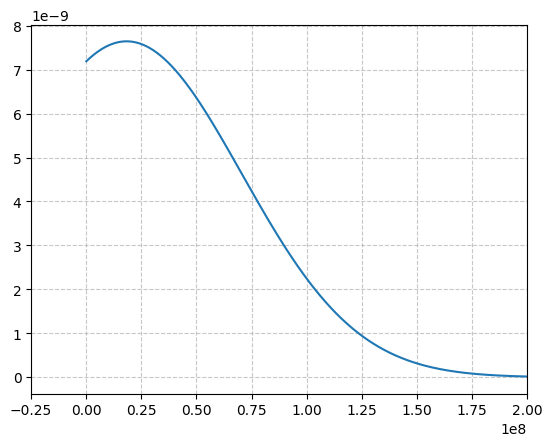

In [40]:
import scipy.stats as stats
spot_tot_stream_mean = np.mean(spotify_data_df['Total Streams'])
spot_tot_stream_std = np.std(spotify_data_df['Total Streams'])
pdf = stats.norm.pdf(spotify_data_df['Total Streams'].sort_values(), spot_tot_stream_mean, spot_tot_stream_std)

print('Mean: ' + '{0:,.1f}'.format(spot_tot_stream_mean))

plt.plot(spotify_data_df['Total Streams'].sort_values(), pdf)
plt.xlim([-25_000_000, 200_000_000])                
plt.grid(True, alpha=0.7, linestyle="--")
plt.show()

A correlation matrix

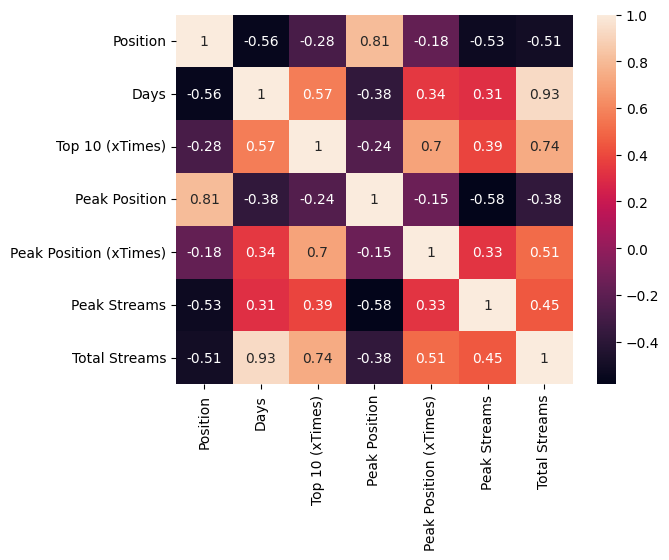

In [10]:
sns.heatmap(spotify_data_df.corr(numeric_only=True), annot=True)
plt.show()

Which arist has most #1 times, regardless of song

In [11]:
spotify_most_no_one_df = spotify_data_df.loc[spotify_data_df['Peak Position'] == 1]
spotify_most_no_one_df = spotify_most_no_one_df.groupby('Artist Name').agg({'Peak Position':'count', 'Peak Position (xTimes)':'sum'}).rename(columns={'Peak Position':'Number_1_count', 'Peak Position (xTimes)':'Peak_Times'})
spotify_most_no_one_df['No_1_Tot_Times'] = spotify_most_no_one_df['Number_1_count'] * spotify_most_no_one_df['Peak_Times']
spotify_most_no_one_df = spotify_most_no_one_df.sort_values(by=['No_1_Tot_Times'], ascending=False)
spotify_most_no_one_df.head(10)

Number_1_count  Peak_Times  No_1_Tot_Times
Artist Name                                                
Drake                        18         391            7038
Post Malone                   9         216            1944
Taylor Swift                 12         101            1212
Ariana Grande                 8         114             912
The Weeknd                    7         114             798
Justin Bieber                 6         115             690
Lil Nas X                     5          87             435
Kendrick Lamar                5          79             395
J. Cole                       8          29             232
Olivia Rodrigo                2          99             198

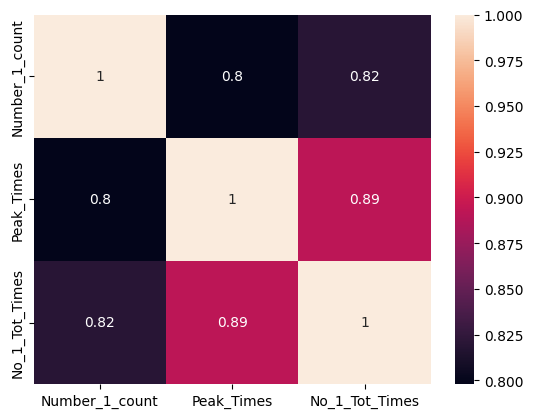

In [12]:
sns.heatmap(spotify_most_no_one_df.corr(numeric_only=True), annot=True)
plt.show()